MODEL - STEP FUNCTION 1 

What this model tries to do is predict the GDP per Capita of a country based on certain indicators. The indicators (independent variables) are below :-
    
    1. Women making informed choices to reproductive health care (Units - % Women Aged 15-49) [DONE#]
    2. Rural Population as % of Total Population (Units - % of Total Population) [DONE#] 
    3. Public Education as a share of GDP (Units - expenditure as % of GDP) [CURRENTLY IGNORE THIS DATA SET]
    4. Legal Rights Strengths Index (Units - Index from 0 to 12) [DONE#]
    5. Domestic Credit to Private Sector (Units - % of GDP) [DONE#]
    6. Births attended by skilled health staff (Units - % of total births) [DONE#]
    7. ATM machines per 100,000 adults (Units - number of machines per 100,000 adults) [DONE#]
    8. Agricultural Machinery (Units - number of tractors per 100 sq Km of arable land) [DONE#]
    9. Literacy rates in the adult population (Units - % of male population educated above 15 years of age) [DONE#]
    10. Accounts at Financial Institutions (Units - % of male population above 15 years of age having accounts) [DONE]
    
The dependant variables are below :-
    1. [DONE] GDP by country (Units - Current US $) 
    2. [DONE] Population per country (Units - in decimal numbers)

In [70]:
%matplotlib inline

In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [72]:
import seaborn as sns
sns.set(color_codes=True)

In [73]:
np.random.seed(sum(map(ord, "regression")))

In [74]:
tips = sns.load_dataset("tips")

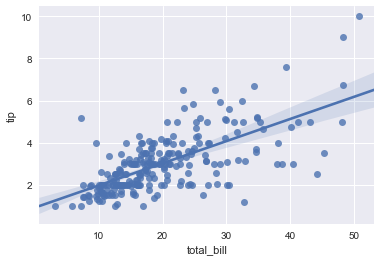

In [75]:
sns.regplot(x="total_bill", y="tip", data=tips);

In [76]:
pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 5000)
pd.set_option('max_columns', 5000)

In [77]:
population_df = pd.read_csv('PopulationPerCountry.csv', skiprows = range(0,4))
population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,16440924.0,16983266.0,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN,NaN


In [78]:
GDP_df = pd.read_csv('GDP by Country.csv', skiprows = range(0,4))
GDP_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.684492e+09,6.684492e+09,6.684492e+09,6.684492e+09,1.002674e+10,1.002674e+10,1.211861e+10,5.684292e+09,5.278183e+09,4.059352e+09,5.039552e+09,7.526447e+09,7.648377e+09,6.445042e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [79]:
GDPData_df = pd.merge(GDP_df, population_df, on= ['Country Code','Country Name'], how='inner')
GDPData_df.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,1968_x,1969_x,1970_x,1971_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,1980_x,1981_x,1982_x,1983_x,1984_x,1985_x,1986_x,1987_x,1988_x,1989_x,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,1998_x,1999_x,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,Unnamed: 62_x,Indicator Name_y,Indicator Code_y,1960_y,1961_y,1962_y,1963_y,1964_y,1965_y,1966_y,1967_y,1968_y,1969_y,1970_y,1971_y,1972_y,1973_y,1974_y,1975_y,1976_y,1977_y,1978_y,1979_y,1980_y,1981_y,1982_y,1983_y,1984_y,1985_y,1986_y,1987_y,1988_y,1989_y,1990_y,1991_y,1992_y,1993_y,1994_y,1995_y,1996_y,1997_y,1998_y,1999_y,2000_y,2001_y,2002_y,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,Unnamed: 62_y
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,NaN,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.684492e+09,6.684492e+09,6.684492e+09,6.684492e+09,1.002674e+10,1.002674e+10,1.211861e+10,5.684292e+09,5.278183e+09,4.059352e+09,5.039552e+09,7.526447e+09,7.648377e+09,6.445042e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,95

In [80]:
GDPDataCurated_df = GDPData_df.drop(['Indicator Name_x','Indicator Code_x','Indicator Name_y','Indicator Code_y','Unnamed: 62_y','Unnamed: 62_x'], axis = 1)
GDPDataCurated_df.head()
# GDP_df is the X column, Population_df is the Y column.

,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,1968_x,1969_x,1970_x,1971_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,1980_x,1981_x,1982_x,1983_x,1984_x,1985_x,1986_x,1987_x,1988_x,1989_x,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,1998_x,1999_x,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,1960_y,1961_y,1962_y,1963_y,1964_y,1965_y,1966_y,1967_y,1968_y,1969_y,1970_y,1971_y,1972_y,1973_y,1974_y,1975_y,1976_y,1977_y,1978_y,1979_y,1980_y,1981_y,1982_y,1983_y,1984_y,1985_y,1986_y,1987_y,1988_y,1989_y,1990_y,1991_y,1992_y,1993_y,1994_y,1995_y,1996_y,1997_y,1998_y,1999_y,2000_y,2001_y,2002_y,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.684492e+09,6.684492e+09,6.684492e+09,6.684492e+09,1.002674e+10,1.002674e+10,1.211861e+10,5.684292e+09,5.278183e+09,4.059352e+09,5.039552e+09,7.526447e+09,7.648377e+09,6.445042e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,16440924.0,16983266.0,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,2336913

In [81]:
GDPperCapita_df = pd.DataFrame()
for col in GDPDataCurated_df.columns:
    if col.endswith("Name"):
        country = col[:]
        GDPperCapita_df[country] = GDPDataCurated_df[country]
    if col.endswith("_x"):
        year = col[:4]
        GDPperCapita_df[year] = GDPDataCurated_df[year + '_x']/GDPDataCurated_df[year + '_y']
    if col.endswith("Code"):
        code = col[:]
        GDPperCapita_df['Units:- US$/person' + code] = GDPDataCurated_df[code]
        
GDPDataCurated_df.head()

,Country Name,Country Code,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,1968_x,1969_x,1970_x,1971_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,1980_x,1981_x,1982_x,1983_x,1984_x,1985_x,1986_x,1987_x,1988_x,1989_x,1990_x,1991_x,1992_x,1993_x,1994_x,1995_x,1996_x,1997_x,1998_x,1999_x,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,2008_x,2009_x,2010_x,2011_x,2012_x,2013_x,2014_x,2015_x,2016_x,2017_x,1960_y,1961_y,1962_y,1963_y,1964_y,1965_y,1966_y,1967_y,1968_y,1969_y,1970_y,1971_y,1972_y,1973_y,1974_y,1975_y,1976_y,1977_y,1978_y,1979_y,1980_y,1981_y,1982_y,1983_y,1984_y,1985_y,1986_y,1987_y,1988_y,1989_y,1990_y,1991_y,1992_y,1993_y,1994_y,1995_y,1996_y,1997_y,1998_y,1999_y,2000_y,2001_y,2002_y,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.330168e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722799e+09,1.873453e+09,1.920263e+09,1.941095e+09,2.021302e+09,2.228279e+09,2.331006e+09,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.684492e+09,6.684492e+09,6.684492e+09,6.684492e+09,1.002674e+10,1.002674e+10,1.211861e+10,5.684292e+09,5.278183e+09,4.059352e+09,5.039552e+09,7.526447e+09,7.648377e+09,6.445042e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.249735e+10,1.418895e+10,1.964085e+10,2.823371e+10,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,16440924.0,16983266.0,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,2336913

In [82]:
GDPperCapita_df.head()      

,Country Name,Units:- US$/personCountry Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17342.471940,16441.790636,16585.195531,17926.572836,19081.351656,19356.203389,20620.700626,20670.655664,20434.299436,20834.510199,22567.824925,23302.831988,24014.944267,25921.026052,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,129.506654,129.798541,157.187422,160.372836,136.117014,144.110319,174.942038,187.975604,199.026173,226.005344,249.287386,277.900742,274.880859,266.493042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.409691,187.845095,198.728544,219.141353,250.294130,272.563077,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.074985,612.074840,595.857754,580.555025,847.766724,823.792184,965.361296,438.320520,393.784521,293.278222,353.182045,512.620966,506.884952,415.693346,385.768853,555.296942,526.168743,711.181716,779.468306,1041.086844,1443.991929,2062.415149,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.520052,662.914793,719.157296,699.384292,676.566733,723.409610,639.463899,348.711318,218.492166,380.527371,619.065163,760.559376,1046.358511,749.584649,865.302162,1098.425463,1175.788981,1326.970339,1453.642777,1890.681557,2416.588235,2709.142931,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.556850,3498.173652,4217.173581,5342.168560,6319.739034,7169.101006,7152.375134,7751.370216,9129.706185,11820.849393,12377.411646,10372.232835,9610.266308,8022.654781,7728.906695,7774.393829,10361.815982,12616.167566,14304.356965,15166.437851,18878.505969,19532.540150,20547.711790,16516.471027,16234.809010,18461.064858,19017.174590,18353.059722,18894.521496,19261.710504,21936.530101,22228.846493,24741.493570,32776.442270,38503.479614,41282.020122,43748.772159,48582.808455,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030,NaN


In [83]:
GDP_Stacked_df = pd.melt(GDPperCapita_df,id_vars=['Country Name','Units:- US$/personCountry Code'])
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,59.777327
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [84]:
WomenMakingInformedChoices_df = pd.read_csv('WomenMakingInformedChoicestoReproductiveHealthCare.csv', skiprows = range(0,4))
WomenMakingInformedChoices_df = pd.melt(WomenMakingInformedChoices_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
WomenMakingInformedChoices_df

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
1,Afghanistan,AFG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
2,Angola,AGO,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
3,Albania,ALB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
4,Andorra,AND,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
5,Arab World,ARB,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
6,United Arab Emirates,ARE,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
7,Argentina,ARG,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
8,Armenia,ARM,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN
9,American Samoa,ASM,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,1960,NaN


In [85]:
RuralPopulationPerCent_df = pd.read_csv('RuralPopulation%ofTotalPopulation.csv', skiprows = range(0,4))
RuralPopulationPerCent_df = RuralPopulationPerCent_df.drop(['Unnamed: 62'],axis = 1)
RuralPopulationPerCent_df = pd.melt(RuralPopulationPerCent_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
RuralPopulationPerCent_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,49.224
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,91.779
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,89.565
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,69.295
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,1960,41.550


In [86]:
PublicEduRatioGDP_df = pd.read_csv('public-education-expenditure-as-share-of-gdp.csv')
#PublicEduRatioGDP_df = pd.melt(PublicEduRatioGDP_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
#PublicEduRatioGDP_df

#IGNORE THIS DATA SET IN THE CURRENT SET OF RESULTS.

In [87]:
LegalRightsStrength_df = pd.read_csv('LegalRightsStrengthIndex.csv', skiprows = range(0,4))
LegalRightsStrength_df = pd.melt(LegalRightsStrength_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LegalRightsStrength_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
1,Afghanistan,AFG,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
2,Angola,AGO,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
3,Albania,ALB,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN
4,Andorra,AND,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,1960,NaN


In [88]:
CreditToPrivateSector_df = pd.read_csv('DomesticCreditToPrivateSector.csv', skiprows = range(0,4))
CreditToPrivateSector_df = CreditToPrivateSector_df.drop(['Unnamed: 62'],axis = 1)
CreditToPrivateSector_df = pd.melt(CreditToPrivateSector_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
CreditToPrivateSector_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
1,Afghanistan,AFG,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,9.272727
2,Angola,AGO,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
3,Albania,ALB,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN
4,Andorra,AND,Domestic credit to private sector (% of GDP),FS.AST.PRVT.GD.ZS,1960,NaN


In [89]:
BirthsAttendedbySkilledStaff_df = pd.read_csv('BirthsAttendedbySkilledHealthStaff%ofTotal.csv', skiprows = range(0,4))
BirthsAttendedbySkilledStaff_df = pd.melt(BirthsAttendedbySkilledStaff_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
BirthsAttendedbySkilledStaff_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
1,Afghanistan,AFG,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
2,Angola,AGO,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
3,Albania,ALB,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN
4,Andorra,AND,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,1960,NaN


In [90]:
ATMMachinesRatio_df = pd.read_csv('ATMMachines_Per100,000Adults.csv', skiprows = range(0,4))
ATMMachinesRatio_df = pd.melt(ATMMachinesRatio_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
ATMMachinesRatio_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
1,Afghanistan,AFG,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
2,Angola,AGO,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
3,Albania,ALB,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN
4,Andorra,AND,"Automated teller machines (ATMs) (per 100,000 ...",FB.ATM.TOTL.P5,1960,NaN


In [91]:
AgriculturalMachines_df = pd.read_csv('AgriculturalMachinery_PerUnitofArableLand.csv', skiprows = range(0,4))
AgriculturalMachines_df = AgriculturalMachines_df.drop(['Unnamed: 62'],axis = 1)
AgriculturalMachines_df = pd.melt(AgriculturalMachines_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
AgriculturalMachines_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
1,Afghanistan,AFG,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
2,Angola,AGO,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
3,Albania,ALB,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN
4,Andorra,AND,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1960,NaN


In [92]:
LiteracyRateAdult_df = pd.read_csv('AdultPopulation_Literate.csv', skiprows = range(0,4))
#AgriculturalMachines_df = AgriculturalMachines_df.drop(['Unnamed: 62'],axis = 1)
LiteracyRateAdult_df = pd.melt(LiteracyRateAdult_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
LiteracyRateAdult_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
1,Afghanistan,AFG,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
2,Angola,AGO,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
3,Albania,ALB,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN
4,Andorra,AND,"Literacy rate, adult male (% of males ages 15 ...",SE.ADT.LITR.MA.ZS,1960,NaN


In [93]:
AccountsRatioFinancialInst_df = pd.read_csv('AccountAtaFinancialInstitutionMale15+%Adults.csv', skiprows = range(0,4))
AccountsRatioFinancialInst_df = AccountsRatioFinancialInst_df.drop(['Unnamed: 62'],axis = 1)
AccountsRatioFinancialInst_df = pd.melt(AccountsRatioFinancialInst_df,id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'])
AccountsRatioFinancialInst_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
0,Aruba,ABW,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
1,Afghanistan,AFG,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
2,Angola,AGO,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
3,Albania,ALB,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN
4,Andorra,AND,"Account at a financial institution, male (% ag...",WP_time_01.2,1960,NaN


In [94]:
GDP_Stacked_df['WomenMakingInformedChoices_df'] = WomenMakingInformedChoices_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df
0,Aruba,ABW,1960,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN
2,Angola,AGO,1960,NaN,NaN
3,Albania,ALB,1960,NaN,NaN
4,Andorra,AND,1960,NaN,NaN


In [95]:
GDP_Stacked_df['RuralPopulationPerCent_df'] = RuralPopulationPerCent_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df
0,Aruba,ABW,1960,NaN,NaN,49.224
1,Afghanistan,AFG,1960,59.777327,NaN,91.779
2,Angola,AGO,1960,NaN,NaN,89.565
3,Albania,ALB,1960,NaN,NaN,69.295
4,Andorra,AND,1960,NaN,NaN,41.550


In [96]:
GDP_Stacked_df['LegalRightsStrength_df'] = LegalRightsStrength_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN


In [97]:
GDP_Stacked_df['CreditToPrivateSector_df'] = CreditToPrivateSector_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN


In [98]:
GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'] = BirthsAttendedbySkilledStaff_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN


In [99]:
GDP_Stacked_df['ATMMachinesRatio_df'] = ATMMachinesRatio_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df,ATMMachinesRatio_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN


In [100]:
GDP_Stacked_df['AgriculturalMachines_df'] = AgriculturalMachines_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df,ATMMachinesRatio_df,AgriculturalMachines_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN


In [101]:
GDP_Stacked_df['LiteracyRateAdult_df'] = LiteracyRateAdult_df.value
GDP_Stacked_df.head()

,Country Name,Units:- US$/personCountry Code,variable,value,WomenMakingInformedChoices_df,RuralPopulationPerCent_df,LegalRightsStrength_df,CreditToPrivateSector_df,BirthsAttendedbySkilledStaff_df,ATMMachinesRatio_df,AgriculturalMachines_df,LiteracyRateAdult_df
0,Aruba,ABW,1960,NaN,NaN,49.224,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1960,59.777327,NaN,91.779,NaN,9.272727,NaN,NaN,NaN,NaN
2,Angola,AGO,1960,NaN,NaN,89.565,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,69.295,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,41.550,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
GDP_Stacked_df['AccountsRatioFinancialInst_df'] = AccountsRatioFinancialInst_df.value
GDP_Stacked_df

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


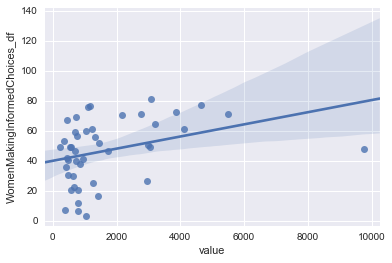

In [103]:
sns.regplot(x="value", y="WomenMakingInformedChoices_df", data=GDP_Stacked_df)

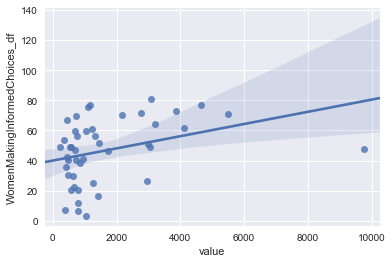

In [104]:
sns.regplot(x="value", y="WomenMakingInformedChoices_df", data=GDP_Stacked_df);

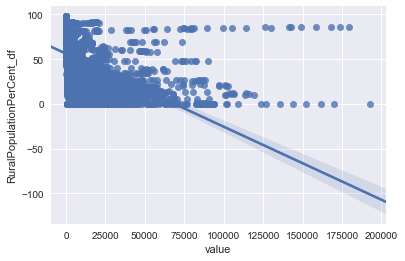

In [105]:
sns.regplot(x="value", y="RuralPopulationPerCent_df", data=GDP_Stacked_df);

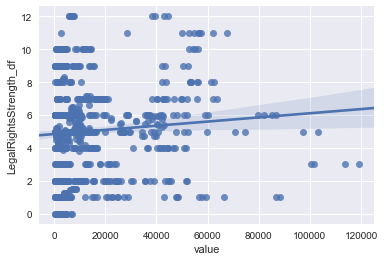

In [106]:
sns.regplot(x="value", y="LegalRightsStrength_df", data=GDP_Stacked_df);

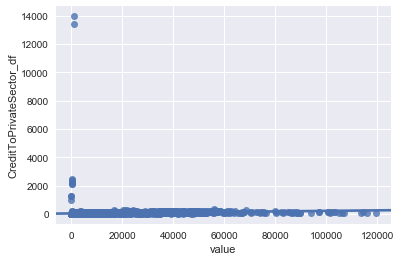

In [107]:
sns.regplot(x="value", y="CreditToPrivateSector_df", data=GDP_Stacked_df);

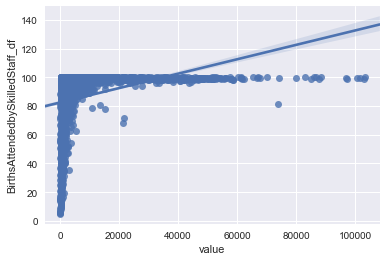

In [108]:
sns.regplot(x="value", y="BirthsAttendedbySkilledStaff_df", data=GDP_Stacked_df);

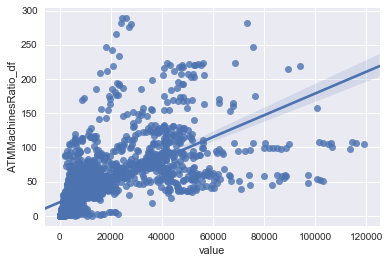

In [109]:
sns.regplot(x="value", y="ATMMachinesRatio_df", data=GDP_Stacked_df);

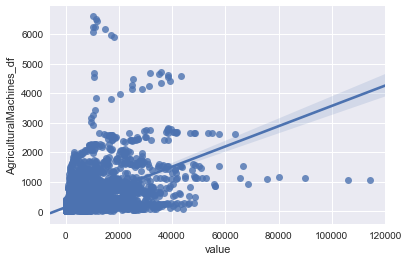

In [110]:
sns.regplot(x="value", y="AgriculturalMachines_df", data=GDP_Stacked_df);

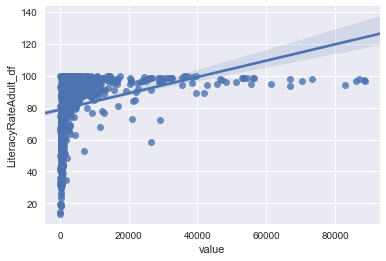

In [111]:
sns.regplot(x="value", y="LiteracyRateAdult_df", data=GDP_Stacked_df);

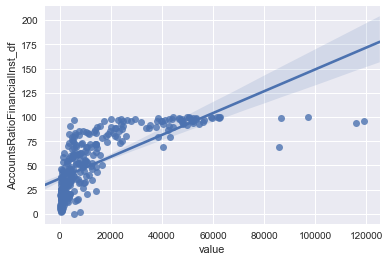

In [112]:
sns.regplot(x="value", y="AccountsRatioFinancialInst_df", data=GDP_Stacked_df);

In [113]:
print(GDP_Stacked_df.isnull().any())
# where value = GDP_per_Capita

Country Name                       False
Units:- US$/personCountry Code     False
variable                           False
value                               True
WomenMakingInformedChoices_df       True
RuralPopulationPerCent_df           True
LegalRightsStrength_df              True
CreditToPrivateSector_df            True
BirthsAttendedbySkilledStaff_df     True
ATMMachinesRatio_df                 True
AgriculturalMachines_df             True
LiteracyRateAdult_df                True
AccountsRatioFinancialInst_df       True
dtype: bool


In [114]:
# Counting missing values in a column

GDP_Stacked_df.dropna(subset=['value'],inplace = True)
print(GDP_Stacked_df['value'].isnull().sum())
print(GDP_Stacked_df['value'].notnull().sum())

0
11504


In [115]:
# Counting missing values in a column
GDP_Stacked_df['WomenMakingInformedChoices_df'].fillna(value=GDP_Stacked_df['WomenMakingInformedChoices_df'].mean(),inplace=True)
print(GDP_Stacked_df['WomenMakingInformedChoices_df'].isnull().sum())
print(GDP_Stacked_df['WomenMakingInformedChoices_df'].notnull().sum())


0
11504


In [116]:
# Counting missing values in a column
GDP_Stacked_df['RuralPopulationPerCent_df'].fillna(value=GDP_Stacked_df['RuralPopulationPerCent_df'].mean(),inplace=True)
print(GDP_Stacked_df['RuralPopulationPerCent_df'].isnull().sum())
print(GDP_Stacked_df['RuralPopulationPerCent_df'].notnull().sum())

0
11504


In [117]:
# Counting missing values in a column
print(GDP_Stacked_df['LegalRightsStrength_df'].isnull().sum())
print(GDP_Stacked_df['LegalRightsStrength_df'].notnull().sum())

10585
919


In [118]:
# Counting missing values in a column
GDP_Stacked_df['CreditToPrivateSector_df'].fillna(value=GDP_Stacked_df['CreditToPrivateSector_df'].mean(),inplace=True)
print(GDP_Stacked_df['CreditToPrivateSector_df'].isnull().sum())
print(GDP_Stacked_df['CreditToPrivateSector_df'].notnull().sum())

0
11504


In [119]:
# Counting missing values in a column
GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].fillna(value=GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].mean(),inplace=True)
print(GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].isnull().sum())
print(GDP_Stacked_df['BirthsAttendedbySkilledStaff_df'].notnull().sum())

0
11504


In [120]:
# Counting missing values in a column
print(GDP_Stacked_df['ATMMachinesRatio_df'].isnull().sum())
print(GDP_Stacked_df['ATMMachinesRatio_df'].notnull().sum())

8844
2660


In [121]:
# Counting missing values in a column
print(GDP_Stacked_df['AgriculturalMachines_df'].isnull().sum())
print(GDP_Stacked_df['AgriculturalMachines_df'].notnull().sum())

5331
6173


In [122]:
# Counting missing values in a column
print(GDP_Stacked_df['LiteracyRateAdult_df'].isnull().sum())
print(GDP_Stacked_df['LiteracyRateAdult_df'].notnull().sum())

10622
882


In [123]:
# Counting missing values in a column
print(GDP_Stacked_df['AccountsRatioFinancialInst_df'].isnull().sum())
print(GDP_Stacked_df['AccountsRatioFinancialInst_df'].notnull().sum())

11194
310


In [124]:
X = GDP_Stacked_df[['CreditToPrivateSector_df','WomenMakingInformedChoices_df','RuralPopulationPerCent_df']]
X = np.array(X)
X

array([[   9.2727267 ,   46.75333333,   91.779     ],
       [  19.1290206 ,   46.75333333,   18.471     ],
       [  44.70480425,   46.75333333,   35.28      ],
       ..., 
       [ 144.41424196,   46.75333333,   34.705     ],
       [  12.0392528 ,   46.75333333,   58.621     ],
       [  44.70480425,   46.75333333,   67.723     ]])

In [125]:
y = GDP_Stacked_df['value']
y = np.array(y)
y

array([   59.77732651,  1809.31145171,   935.46042685, ...,  5284.60360431,
        1269.57353679,  1029.07664868])

In [126]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.15/0.85, random_state=0)

In [127]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [128]:
y_pred = model.predict(X_train_val)
y_actual = Y_train_val
mean_squared_error(y_actual, y_pred)

67306660.301193938

0.657441538118


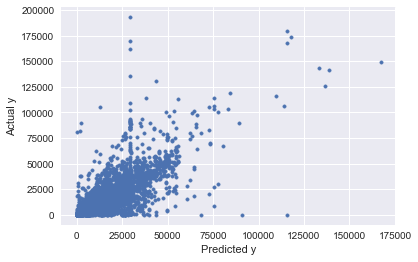

In [129]:
# Test R^2
print(model.score(X_train_val, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()